# Random Forest

### What is random forest?

Random forest is a flexible, easy-to-use machine learning algorithm that produces, even without hyperparameter tuning, a great result most of the time. It is also one of the most-used algorithms, due to its simplicity and diversity (it can be used for both classification and regression tasks). It is an ensemble learning method that builds multiple decision trees and combines their predictions to improve accuracy and reduce overfitting. 

Decision trees are a great starting point in machine learning — they’re clear and make sense. But there’s a catch: they often don’t work well when dealing with new data. The predictions can be inconsistent and unreliable, which is a real problem when you’re trying to build something useful.

This is where Random Forest comes in. It takes what’s good about decision trees and makes them work better by combining multiple trees together. It’s become a favorite tool for many data scientists because it’s both effective and practical.

Let’s see how Random Forest works and why it might be exactly what you need for your next project. It’s time to stop getting lost in the trees and see the forest for what it really is — your next reliable tool in machine learning.

### Definition

A Random Forest is an ensemble machine learning model that combines multiple decision trees. Each tree in the forest is trained on a random sample of the data (bootstrap sampling) and considers only a random subset of features when making splits (feature randomization).

For classification tasks, the forest predicts by majority voting among trees, while for regression tasks, it averages the predictions. The model’s strength comes from its “wisdom of crowds” approach — while individual trees might make errors, the collective decision-making process tends to average out these mistakes and arrive at more reliable predictions.

<img src="images/random_forest_example1.png" />

The logic behind the Random Forest model is that multiple uncorrelated models (the individual decision trees) perform much better as a group than they do alone. When using Random Forest for classification, each tree gives a classification or a “vote.” The forest chooses the classification with the majority of the “votes.” When using Random Forest for regression, the forest picks the average of the outputs of all trees.

The key here lies in the fact that there is low (or no) correlation between the individual models—that is, between the decision trees that make up the larger Random Forest model. While individual decision trees may produce errors, the majority of the group will be correct, thus moving the overall outcome in the right direction.

### How Random Forests Work

The random forest algorithm operates in the following steps:

1. **Bootstrap Sampling (Bagging):**
    - From the original training dataset, multiple bootstrap samples are generated. A bootstrap sample is a random sample drawn with replacement, meaning that the same data point may appear more than once in a sample, while others may not appear at all.
    - Each decision tree in the random forest is trained on a different bootstrap sample.

2. **Random Feature Selection:**
    - At each node of the decision tree, instead of considering all features (as in standard decision trees), the algorithm randomly selects a subset of features. This adds additional randomness and helps decorrelate the trees, making the final model more generalizable.
    - This random feature selection is a key difference between random forests and bagging with decision trees.

3. **Grow Decision Trees:**
    - Each tree in the forest is grown to the maximum extent without pruning. The goal is to let each tree overfit its particular bootstrap sample.

4. **Aggregation:**
    - For classification, the predictions of all trees are combined using majority voting. The class that gets the most votes becomes the final prediction.
    - For regression, the predictions of all trees are averaged to produce the final output.

### Key Hyperparameters of Random Forests

Tuning the hyperparameters of a random forest model can have a significant impact on its performance. The main hyperparameters include:

1. **Number of Trees (`n_estimators`):**
    - This parameter specifies how many trees the random forest should include. More trees generally improve accuracy, but they also increase computational cost.

2. **Number of Features to Consider (max_features):**
    - Controls how many features the algorithm should consider when making splits at each node. Options include:
    - `auto`: Use the square root of the number of features (default for classification).
    - `sqrt`: Same as `auto`.
    - `log2`: Use the logarithm of the number of features.
    - An integer: Specify an exact number of features to consider.

3. **Tree Depth (`max_depth`):**
    - Limits the maximum depth of the individual trees. Shallow trees help reduce overfitting, but if trees are too shallow, the model may underfit.

4. **Minimum Samples per Split (`min_samples_split`):**
    - The minimum number of samples required to split an internal node. Higher values prevent trees from being too specific to small groups of data, reducing overfitting.

5. **Minimum Samples per Leaf (`min_samples_leaf`):**
    - The minimum number of samples required to be at a leaf node. It prevents overly small leaves, which can lead to overfitting.

6. **Bootstrap Sampling (`bootstrap`):**
    - A boolean parameter that controls whether bootstrap samples are used when building trees. If set to False, the entire dataset is used for training each tree.

### Advantages of Random Forests

- **Robustness:** Random forests are resistant to overfitting, even with noisy datasets, because they aggregate many decision trees.
- **Versatility:** They can be used for both classification and regression problems.
- **Handles Missing Data:** Random forests can maintain good performance even when some data is missing.
- **Feature Importance:** Random forests can estimate the importance of each feature, making them valuable for feature selection.
- **Scalability:** Random forests are easily parallelizable, allowing them to scale to large datasets.

---

### Disadvantages of Random Forests

- **Interpretability**: While decision trees are easy to interpret, random forests are harder to interpret since they involve multiple trees. It can be difficult to understand the model as a whole.
- **Computationally Intensive:** Building a large number of trees can be computationally expensive, especially for large datasets.
- **Memory Usage:** Random forests require significant memory, as each tree needs to be stored.
- **Slow Predictions:** Making predictions with random forests can be slower than with a single decision tree, as it requires querying each tree in the forest.

### Theory in Action

We’ll focus on the classic golf dataset as an example for classification. While Random Forests can handle both classification and regression tasks equally well, we’ll concentrate on the classification part — predicting whether someone will play golf based on weather conditions. The concepts we’ll explore can be easily adapted to regression problems (like predicting number of player) using the same principles.

<img src="images/train_set_test_set.png" width=800 />

**Columns:**

- `Overcast` - one-hot-encoded into 3 columns
- `Temperature` - in Fahrenheit
- `Humidity` - (in %)
- `Windy` - Yes/No 
- `Play` - Yes/No, target feature

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Create and prepare dataset
dataset_dict = {
    'Outlook': ['sunny', 'sunny', 'overcast', 'rainy', 'rainy', 'rainy', 'overcast', 
                'sunny', 'sunny', 'rainy', 'sunny', 'overcast', 'overcast', 'rainy',
                'sunny', 'overcast', 'rainy', 'sunny', 'sunny', 'rainy', 'overcast',
                'rainy', 'sunny', 'overcast', 'sunny', 'overcast', 'rainy', 'overcast'],
    'Temperature': [85.0, 80.0, 83.0, 70.0, 68.0, 65.0, 64.0, 72.0, 69.0, 75.0, 75.0,
                   72.0, 81.0, 71.0, 81.0, 74.0, 76.0, 78.0, 82.0, 67.0, 85.0, 73.0,
                   88.0, 77.0, 79.0, 80.0, 66.0, 84.0],
    'Humidity': [85.0, 90.0, 78.0, 96.0, 80.0, 70.0, 65.0, 95.0, 70.0, 80.0, 70.0,
                 90.0, 75.0, 80.0, 88.0, 92.0, 85.0, 75.0, 92.0, 90.0, 85.0, 88.0,
                 65.0, 70.0, 60.0, 95.0, 70.0, 78.0],
    'Wind': [False, True, False, False, False, True, True, False, False, False, True,
             True, False, True, True, False, False, True, False, True, True, False,
             True, False, False, True, False, False],
    'Play': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes',
             'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes',
             'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes']
}

# Prepare data
df = pd.DataFrame(dataset_dict)
df = pd.get_dummies(df, columns=['Outlook'], prefix='', prefix_sep='', dtype=int)
df['Wind'] = df['Wind'].astype(int)
df['Play'] = (df['Play'] == 'Yes').astype(int)

# Rearrange columns
column_order = ['sunny', 'overcast', 'rainy', 'Temperature', 'Humidity', 'Wind', 'Play']
df = df[column_order]

# Prepare features and target
X,y = df.drop('Play', axis=1), df['Play']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, shuffle=False)

<img src="images/random_forest_main_mechanism.png" width=800 />

A Random Forest Classifier makes predictions by combining results from 100 different decision trees, each analyzing features like temperature and outlook conditions. The final prediction comes from the most common answer among all trees.

**Step 1:** Bootstrap Sample Creation

<img src="images/bootstrap_sampling.png" width=800 style="background: white;" />

Random Forest creates different training sets for each tree by randomly picking data points from the original training set, with some numbers appearing multiple times. The unused data points become test sets for checking each tree’s performance.

In [4]:
# Generate 100 bootstrap samples
n_samples = len(X_train)
n_bootstraps = 100
all_bootstrap_indices = []
all_oob_indices = []

np.random.seed(42)  # For reproducibility
for i in range(n_bootstraps):
    # Generate bootstrap sample indices
    bootstrap_indices = np.random.choice(n_samples, size=n_samples, replace=True)
    
    # Find OOB indices
    oob_indices = list(set(range(n_samples)) - set(bootstrap_indices))
    
    all_bootstrap_indices.append(bootstrap_indices)
    all_oob_indices.append(oob_indices)

# Print details for samples 1, 2, and 100
samples_to_show = [0, 1, 99]

for i in samples_to_show:
    print(f"\nBootstrap Sample {i+1}:")
    print(f"Chosen indices: {sorted(map(int, all_bootstrap_indices[i]))}")
    print(f"Number of unique chosen indices: {len(set(all_bootstrap_indices[i]))}")
    print(f"OOB indices: {sorted(all_oob_indices[i])}")
    print(f"Number of OOB samples: {len(all_oob_indices[i])}")
    print(f"Percentage of OOB: {len(all_oob_indices[i])/n_samples*100:.1f}%")


Bootstrap Sample 1:
Chosen indices: [2, 3, 4, 6, 6, 6, 7, 7, 9, 10, 10, 10, 12, 12]
Number of unique chosen indices: 8
OOB indices: [0, 1, 5, 8, 11, 13]
Number of OOB samples: 6
Percentage of OOB: 42.9%

Bootstrap Sample 2:
Chosen indices: [1, 1, 2, 3, 4, 4, 5, 5, 7, 7, 7, 11, 11, 13]
Number of unique chosen indices: 8
OOB indices: [0, 6, 8, 9, 10, 12]
Number of OOB samples: 6
Percentage of OOB: 42.9%

Bootstrap Sample 100:
Chosen indices: [0, 1, 3, 3, 4, 7, 7, 7, 8, 10, 11, 11, 11, 13]
Number of unique chosen indices: 9
OOB indices: [2, 5, 6, 9, 12]
Number of OOB samples: 5
Percentage of OOB: 35.7%


**Step 2:** Tree Construction

2.1. Start at root node with complete bootstrap sample
<img src="images/tree_construction.png" width=800 />

When building each decision tree, Random Forest considers a subset of data points and creates splits based on questions about their values — sending smaller values to the left and larger values to the right to make predictions.

a. Calculate initial node impurity using all samples in node
- Classification: Gini or entropy
- Regression: MSE

<img src="images/2_1_a.png" width=800 style="background:white;" />

Random Forest starts by calculating the Gini Impurity of the entire dataset (before any splits) using the ratio of YES and NO labels — a measure of how mixed the labels are in the current data.

b. Select random subset of features from total available features:
- Classification: $\sqrt{\text{nfeatures}}$
- Regression: $\text{nfeatures}/3$

<img src="images/2_1_b.png" width=800 style="background:white;" />

For each split in a tree, Random Forest randomly picks a subset of weather features (here 2 out of 6) to consider, making each tree focus on different aspects of the data.

c. For each selected feature:
- Sort data points by feature values
- Identify potential split points (midpoints between consecutive unique feature values)

<img src="images/2_1_c.png" width=800 style="background:white;" />

For each chosen feature, Random Forest looks at all possible split points in the sorted data (like temperature values 66.0, 69.0, 71.0, etc.) to find the best way to separate the data into two groups.

d. For each potential split point:
- Divide samples into left and right groups
- Calculate left child impurity using its samples
- Calculate right child impurity using its samples
- Calculate impurity reduction:
`parent_impurity — (left_weight × left_impurity + right_weight × right_impurity)`

<img src="images/2_1_d.png" width=800 style="background: white;" />

To find the best split point, Random Forest calculates Gini Impurity for each possible split, takes a weighted average based on group sizes, and picks the split that gives the biggest reduction in impurity from the parent node.

e. Split the current node data using the feature and split point that gives the highest impurity reduction. Then pass data points to the respective child nodes.

<img src="images/2_1_e.png" width=800 style="background: white;" />

After comparing all possible splits, Random Forest picks the temperature threshold of 73.5°F as it gives the largest impurity reduction (0.041), creating two groups: one mixed group with temperatures below 73.5°F and one pure group.

f. For each child node, repeat the process (step b-e) until:
- Pure node or minimum impurity decrease
- Minimum samples threshold
- Maximum depth
- Maximum leaf nodes

<img src="images/2_1_f.png" width=800 style="background: white;" />

This process continues for each new group (node): randomly select features, find the best split point, and divide the data further until each group is pure (all YES or all NO) or can’t be split anymore.

**Step 3:** Tree Construction
Repeat the whole Step 2 for other bootstrap samples.

<img src="images/3_1.png" width=800 style="background: white;" />

Each decision tree in the Random Forest splits data in different ways using different features and thresholds. This variety helps the forest make better predictions than any single tree.

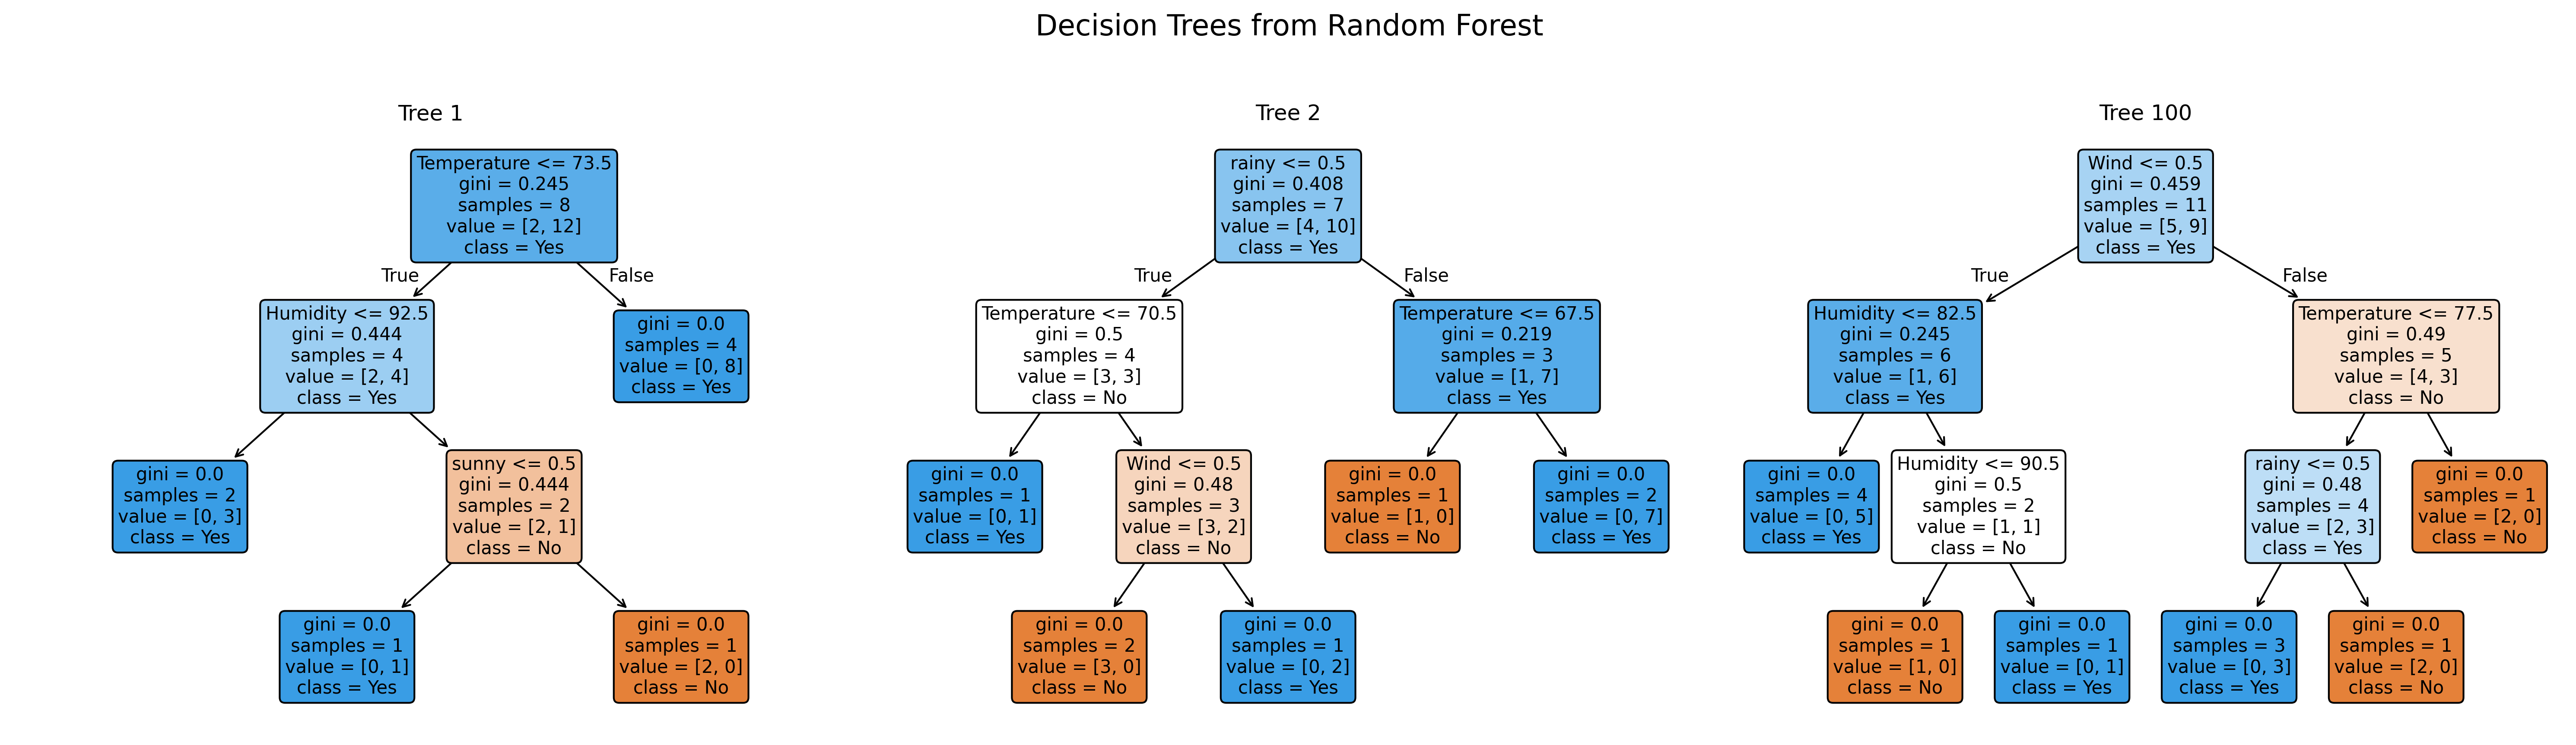

In [5]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
np.random.seed(42)  # For reproducibility
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Create visualizations for trees 1, 2, and 100
trees_to_show = [0, 1, 99]  # Python uses 0-based indexing
feature_names = X_train.columns.tolist()
class_names = ['No', 'Yes']

# Set up the plot
fig, axes = plt.subplots(1, 3, figsize=(20, 6), dpi=300)  # Reduced height, increased DPI
fig.suptitle('Decision Trees from Random Forest', fontsize=16)

# Plot each tree
for idx, tree_idx in enumerate(trees_to_show):
    plot_tree(rf.estimators_[tree_idx], 
              feature_names=feature_names,
              class_names=class_names,
              filled=True,
              rounded=True,
              ax=axes[idx],
              fontsize=10)  # Increased font size
    axes[idx].set_title(f'Tree {tree_idx + 1}', fontsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

### Testing Step

For prediction, route new samples through all trees and aggregate:
- Classification: majority vote
- Regression: mean prediction

<img src="images/testing_step.png" width=800 style="background: white;" />

When new data comes in, each tree in the Random Forest uses its own decision path to make a prediction. The forest combines all these predictions (74 YES vs 26 NO) and the majority vote becomes the final answer (YES in this case).

### Out-of-Bag (OOB) Evaluation

Remember those samples that didn’t get used for training each tree — that leftover 1/3? Those are your OOB samples. Instead of just ignoring them, Random Forest uses them as a convenient validation set for each tree.

<img src="images/out_of_bag.png" width=800 style="background: white;" />

Each tree gets tested on its own out-of-bag samples (data not used in its training). By averaging these individual OOB accuracy scores (50%, 66.6%, 60%), Random Forest provides a built-in way to measure performance without needing a separate test set.

### Evaluation Step

After building all the trees, we can evaluate the test set.

<img src="images/evaluation_step.png" width=800 style="background: white;" />

By combining multiple diverse decision trees and using majority voting, Random Forest achieves a high accuracy of 85.7% — typically better than single decision trees or simpler models!

### Resources for this content

<a href="https://towardsdatascience.com/random-forest-explained-a-visual-guide-with-code-examples-9f736a6e1b3c">Random Forest, Explained: A Visual Guide with Code Examples</a>

<a href="https://www.turing.com/kb/random-forest-algorithm">Random Forest Algorithm - How It Works & Why It’s So Effective</a>